In [176]:
import pandas as pd
data = pd.read_csv('C://Users//upesc//OneDrive - UPES//Documents//HDR23-24_Composite_indices_complete_time_series.csv', encoding='ISO-8859-1')
data.head()

,iso3,country,hdicode,region,hdi_rank_2022,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,pop_total_2013,pop_total_2014,pop_total_2015,pop_total_2016,pop_total_2017,pop_total_2018,pop_total_2019,pop_total_2020,pop_total_2021,pop_total_2022
0,AFG,Afghanistan,Low,SA,182.0,0.284,0.292,0.299,0.307,0.300,...,31.541208,32.716210,33.753499,34.636207,35.643417,36.686784,37.769498,38.972231,40.099462,41.128771
1,ALB,Albania,High,ECA,74.0,0.649,0.632,0.616,0.618,0.623,...,2.887014,2.884102,2.882480,2.881063,2.879355,2.877013,2.873883,2.866849,2.854710,2.842321
2,DZA,Algeria,High,AS,93.0,0.593,0.596,0.601,0.602,0.603,...,38.000627,38.760168,39.543154,40.339329,41.136546,41.927007,42.705368,43.451666,44.177968,44.903225
3,AND,Andorra,Very High,NaN,35.0,NaN,NaN,NaN,NaN,NaN,...,0.071366,0.071622,0.071746,0.072540,0.073836,0.075013,0.076343,0.077700,0.079034,0.079824
4,AGO,Angola,Medium,SSA,150.0,NaN,NaN,NaN,NaN,NaN,...,26.147002,27.128336,28.127721,29.154746,30.208628,31.273533,32.353588,33.428486,34.503774,35.588987


In [178]:
data.isnull().sum()
data.ffill(inplace=True)


In [180]:
matching_columns = [col for col in data.columns if any(keyword in col.lower() for keyword in ['iso', 'country', 'hdi', 'region'])]
matching_columns



['iso3',
 'country',
 'hdicode',
 'region',
 'hdi_rank_2022',
 'hdi_1990',
 'hdi_1991',
 'hdi_1992',
 'hdi_1993',
 'hdi_1994',
 'hdi_1995',
 'hdi_1996',
 'hdi_1997',
 'hdi_1998',
 'hdi_1999',
 'hdi_2000',
 'hdi_2001',
 'hdi_2002',
 'hdi_2003',
 'hdi_2004',
 'hdi_2005',
 'hdi_2006',
 'hdi_2007',
 'hdi_2008',
 'hdi_2009',
 'hdi_2010',
 'hdi_2011',
 'hdi_2012',
 'hdi_2013',
 'hdi_2014',
 'hdi_2015',
 'hdi_2016',
 'hdi_2017',
 'hdi_2018',
 'hdi_2019',
 'hdi_2020',
 'hdi_2021',
 'hdi_2022',
 'hdi_f_1990',
 'hdi_f_1991',
 'hdi_f_1992',
 'hdi_f_1993',
 'hdi_f_1994',
 'hdi_f_1995',
 'hdi_f_1996',
 'hdi_f_1997',
 'hdi_f_1998',
 'hdi_f_1999',
 'hdi_f_2000',
 'hdi_f_2001',
 'hdi_f_2002',
 'hdi_f_2003',
 'hdi_f_2004',
 'hdi_f_2005',
 'hdi_f_2006',
 'hdi_f_2007',
 'hdi_f_2008',
 'hdi_f_2009',
 'hdi_f_2010',
 'hdi_f_2011',
 'hdi_f_2012',
 'hdi_f_2013',
 'hdi_f_2014',
 'hdi_f_2015',
 'hdi_f_2016',
 'hdi_f_2017',
 'hdi_f_2018',
 'hdi_f_2019',
 'hdi_f_2020',
 'hdi_f_2021',
 'hdi_f_2022',
 'hdi_m_1990',

In [182]:
from sklearn.model_selection import train_test_split

hdi_columns = [
    'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994', 'hdi_1995', 'hdi_1996',
    'hdi_1997', 'hdi_1998', 'hdi_1999', 'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 
    'hdi_2004', 'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009', 'hdi_2010', 
    'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 
    'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021', 'hdi_2022'
]

X = data[hdi_columns]
y = data['country']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [184]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)


In [186]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)


In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=1))


Accuracy: 0.0
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


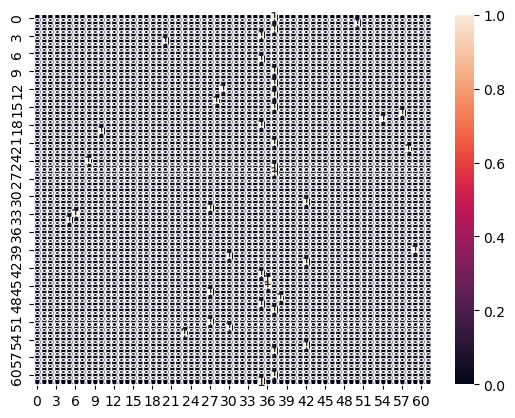

In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
